In [1]:
import random
import torch
import numpy as np
from experiments import make_DF, lr_training, lr_experiment_analysis, error, experiment_analysis, CDF, latex_table
import pandas as pd
import time

# Learning Rate Tuning

In [2]:
FW_lr_DF = pd.read_pickle("DataFrames/FW_lr_DF.pkl")
FM_lr_DF = pd.read_pickle("DataFrames/FM_lr_DF.pkl")
WD2_lr_DF = pd.read_pickle("DataFrames/WD2_lr_DF.pkl")
WDinf_lr_DF = pd.read_pickle("DataFrames/WDinf_lr_DF.pkl")
PCA_lr_DF = pd.read_pickle("DataFrames/PCA_lr_DF.pkl")
LogR_lr_DF = pd.read_pickle("DataFrames/LogR_lr_DF.pkl")
LR_lr_DF = pd.read_pickle("DataFrames/LR_lr_DF.pkl")

In [3]:
FW_mean_std_DF = lr_experiment_analysis(FW_lr_DF)
FM_mean_std_DF = lr_experiment_analysis(FM_lr_DF)
WD2_mean_std_DF = lr_experiment_analysis(WD2_lr_DF)
WDinf_mean_std_DF = lr_experiment_analysis(WDinf_lr_DF)
PCA_mean_std_DF = lr_experiment_analysis(PCA_lr_DF)
LogR_mean_std_DF = lr_experiment_analysis(LogR_lr_DF)
LR_mean_std_DF = lr_experiment_analysis(LR_lr_DF, relative = False)

c:\Users\rst17\OneDrive - Imperial College London\TropicalGD\TropicalGradDescent\experiments.py:251: RuntimeWarning: invalid value encountered in log
  return np.log(np.array(loss_values) - global_soln*0.99) - np.log(np.abs(global_soln)*0.99)


In [4]:
mean_std_DF_list = [FW_mean_std_DF, FM_mean_std_DF, WD2_mean_std_DF, WDinf_mean_std_DF, PCA_mean_std_DF, LogR_mean_std_DF, LR_mean_std_DF]
trained_lr_DF = []

for mean_std_DF in mean_std_DF_list:
    df = pd.DataFrame(mean_std_DF.groupby(['lrs', 'data_dim', 'data_count', 'grad'])['mean'].agg([('mean', 'mean')])['mean'].unstack(level=[1,2,3]).idxmin(), columns = ['lrs'])

    df.reset_index(inplace=True)

    trained_lr_DF.append(df)
    
[FW_trained_lr_DF,FM_trained_lr_DF,WD2_trained_lr_DF,WDinf_trained_lr_DF,PCA_trained_lr_DF,LogR_trained_lr_DF,LR_trained_lr_DF] = trained_lr_DF

In [5]:
DFS = [FW_trained_lr_DF, FM_trained_lr_DF, WD2_trained_lr_DF, WDinf_trained_lr_DF, PCA_trained_lr_DF, LogR_trained_lr_DF, LR_trained_lr_DF]

for DF in DFS:
    
    printing_df = DF.copy(deep = True)
    printing_df['lr'] = printing_df['lrs'].map(lambda x: f'{x:.3g}')
    printing_df = printing_df.pivot(index = ['data_dim', 'data_count'], columns = 'grad', values = 'lr')
    #printing_df[]

    print(printing_df.iloc[:,[2,4,3,6,0,1,5]].to_latex())

\begin{tabular}{lllllllll}
\toprule
 & grad & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
data_dim & data_count &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{6} & 10 & 0.135 & 0.135 & 0.135 & 0.135 & 0.00674 & 0.00674 & 0.00674 \\
 & 100 & 0.135 & 0.135 & 0.135 & 0.135 & 0.00248 & 0.00248 & 0.00674 \\
\cline{1-9}
\multirow[t]{2}{*}{28} & 10 & 0.368 & 0.368 & 0.368 & 1 & 0.00674 & 0.00674 & 0.0183 \\
 & 100 & 0.368 & 0.135 & 0.368 & 1 & 0.00674 & 0.00674 & 0.0183 \\
\cline{1-9}
\bottomrule
\end{tabular}

\begin{tabular}{lllllllll}
\toprule
 & grad & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
data_dim & data_count &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{6} & 10 & 0.135 & 0.135 & 0.135 & 0.135 & 0.00674 & 0.00674 & 0.00674 \\
 & 100 & 0.135 & 0.135 & 0.135 & 0.135 & 0.00674 & 0.00248 & 0.00674 \\
\cline{1-9}
\multirow[t]{2}{*}{28} & 10 & 0.368 & 0.368 & 0.368 & 1 & 0.00674 & 0.00674 & 0.0183 \\
 & 100 & 0.368 & 0.135 & 0.368 & 1 & 0.00674 & 0.006

In [6]:
FW_trained_lr_DF.to_pickle("DataFrames/FW_trained_lr_DF.pkl")
FM_trained_lr_DF.to_pickle("DataFrames/FM_trained_lr_DF.pkl")
WD2_trained_lr_DF.to_pickle("DataFrames/WD2_trained_lr_DF.pkl")
WDinf_trained_lr_DF.to_pickle("DataFrames/WDinf_trained_lr_DF.pkl")
PCA_trained_lr_DF.to_pickle("DataFrames/PCA_trained_lr_DF.pkl")
LogR_trained_lr_DF.to_pickle("DataFrames/LogR_trained_lr_DF.pkl")
LR_trained_lr_DF.to_pickle("DataFrames/LR_trained_lr_DF.pkl")

# Fermat Weber Points

In [7]:
FW_DF = pd.read_pickle("DataFrames/FW_DF.pkl")

In [8]:
Stats_Prob = "FW"
FW_mean_std_DF, FW_solution_DF, FW_log_error_DF = experiment_analysis(FW_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -4.60 & -4.60 & -4.50 & -3.32 & -4.60 & -4.60 & -4.60 \\
6$times$10 Coalescent Data & -4.58 & -4.55 & -4.40 & -1.28 & -4.57 & -4.57 & -4.57 \\
6$times$10 Gaussian Data & -4.60 & -4.60 & -4.44 & -2.75 & -4.60 & -4.60 & -4.56 \\
6$times$100 Branching Data & -4.60 & -4.60 & -4.39 & -4.02 & -4.54 & -4.58 & -4.59 \\
6$times$100 Coalescent Data & -4.55 & -4.54 & -4.25 & -2.88 & -4.56 & -4.58 & -4.55 \\
6$times$100 Gaussian Data & -4.60 & -4.60 & -4.39 & -4.03 & -4.52 & -4.57 & -4.59 \\
28$times$10 Branching Data & -4.60 & -4.60 & -4.15 & -1.89 & -4.60 & -4.60 & -4.56 \\
28$times$10 Coalescent Data & -4.53 & -3.76 & -3.96 & -2.11 & -4.52 & -4.57 & -3.87 \\
28$times$10 Gaussian Data & -4.58 & -4.58 & -4.07 & -2.40 & -4.60 & -4.60 & -4.47 \\
28$times$100 Branching Data & -4.59 & -4.57 & -4.04 & -2.89 & -4.59 & -4.59 & -4.59 \\
28$time

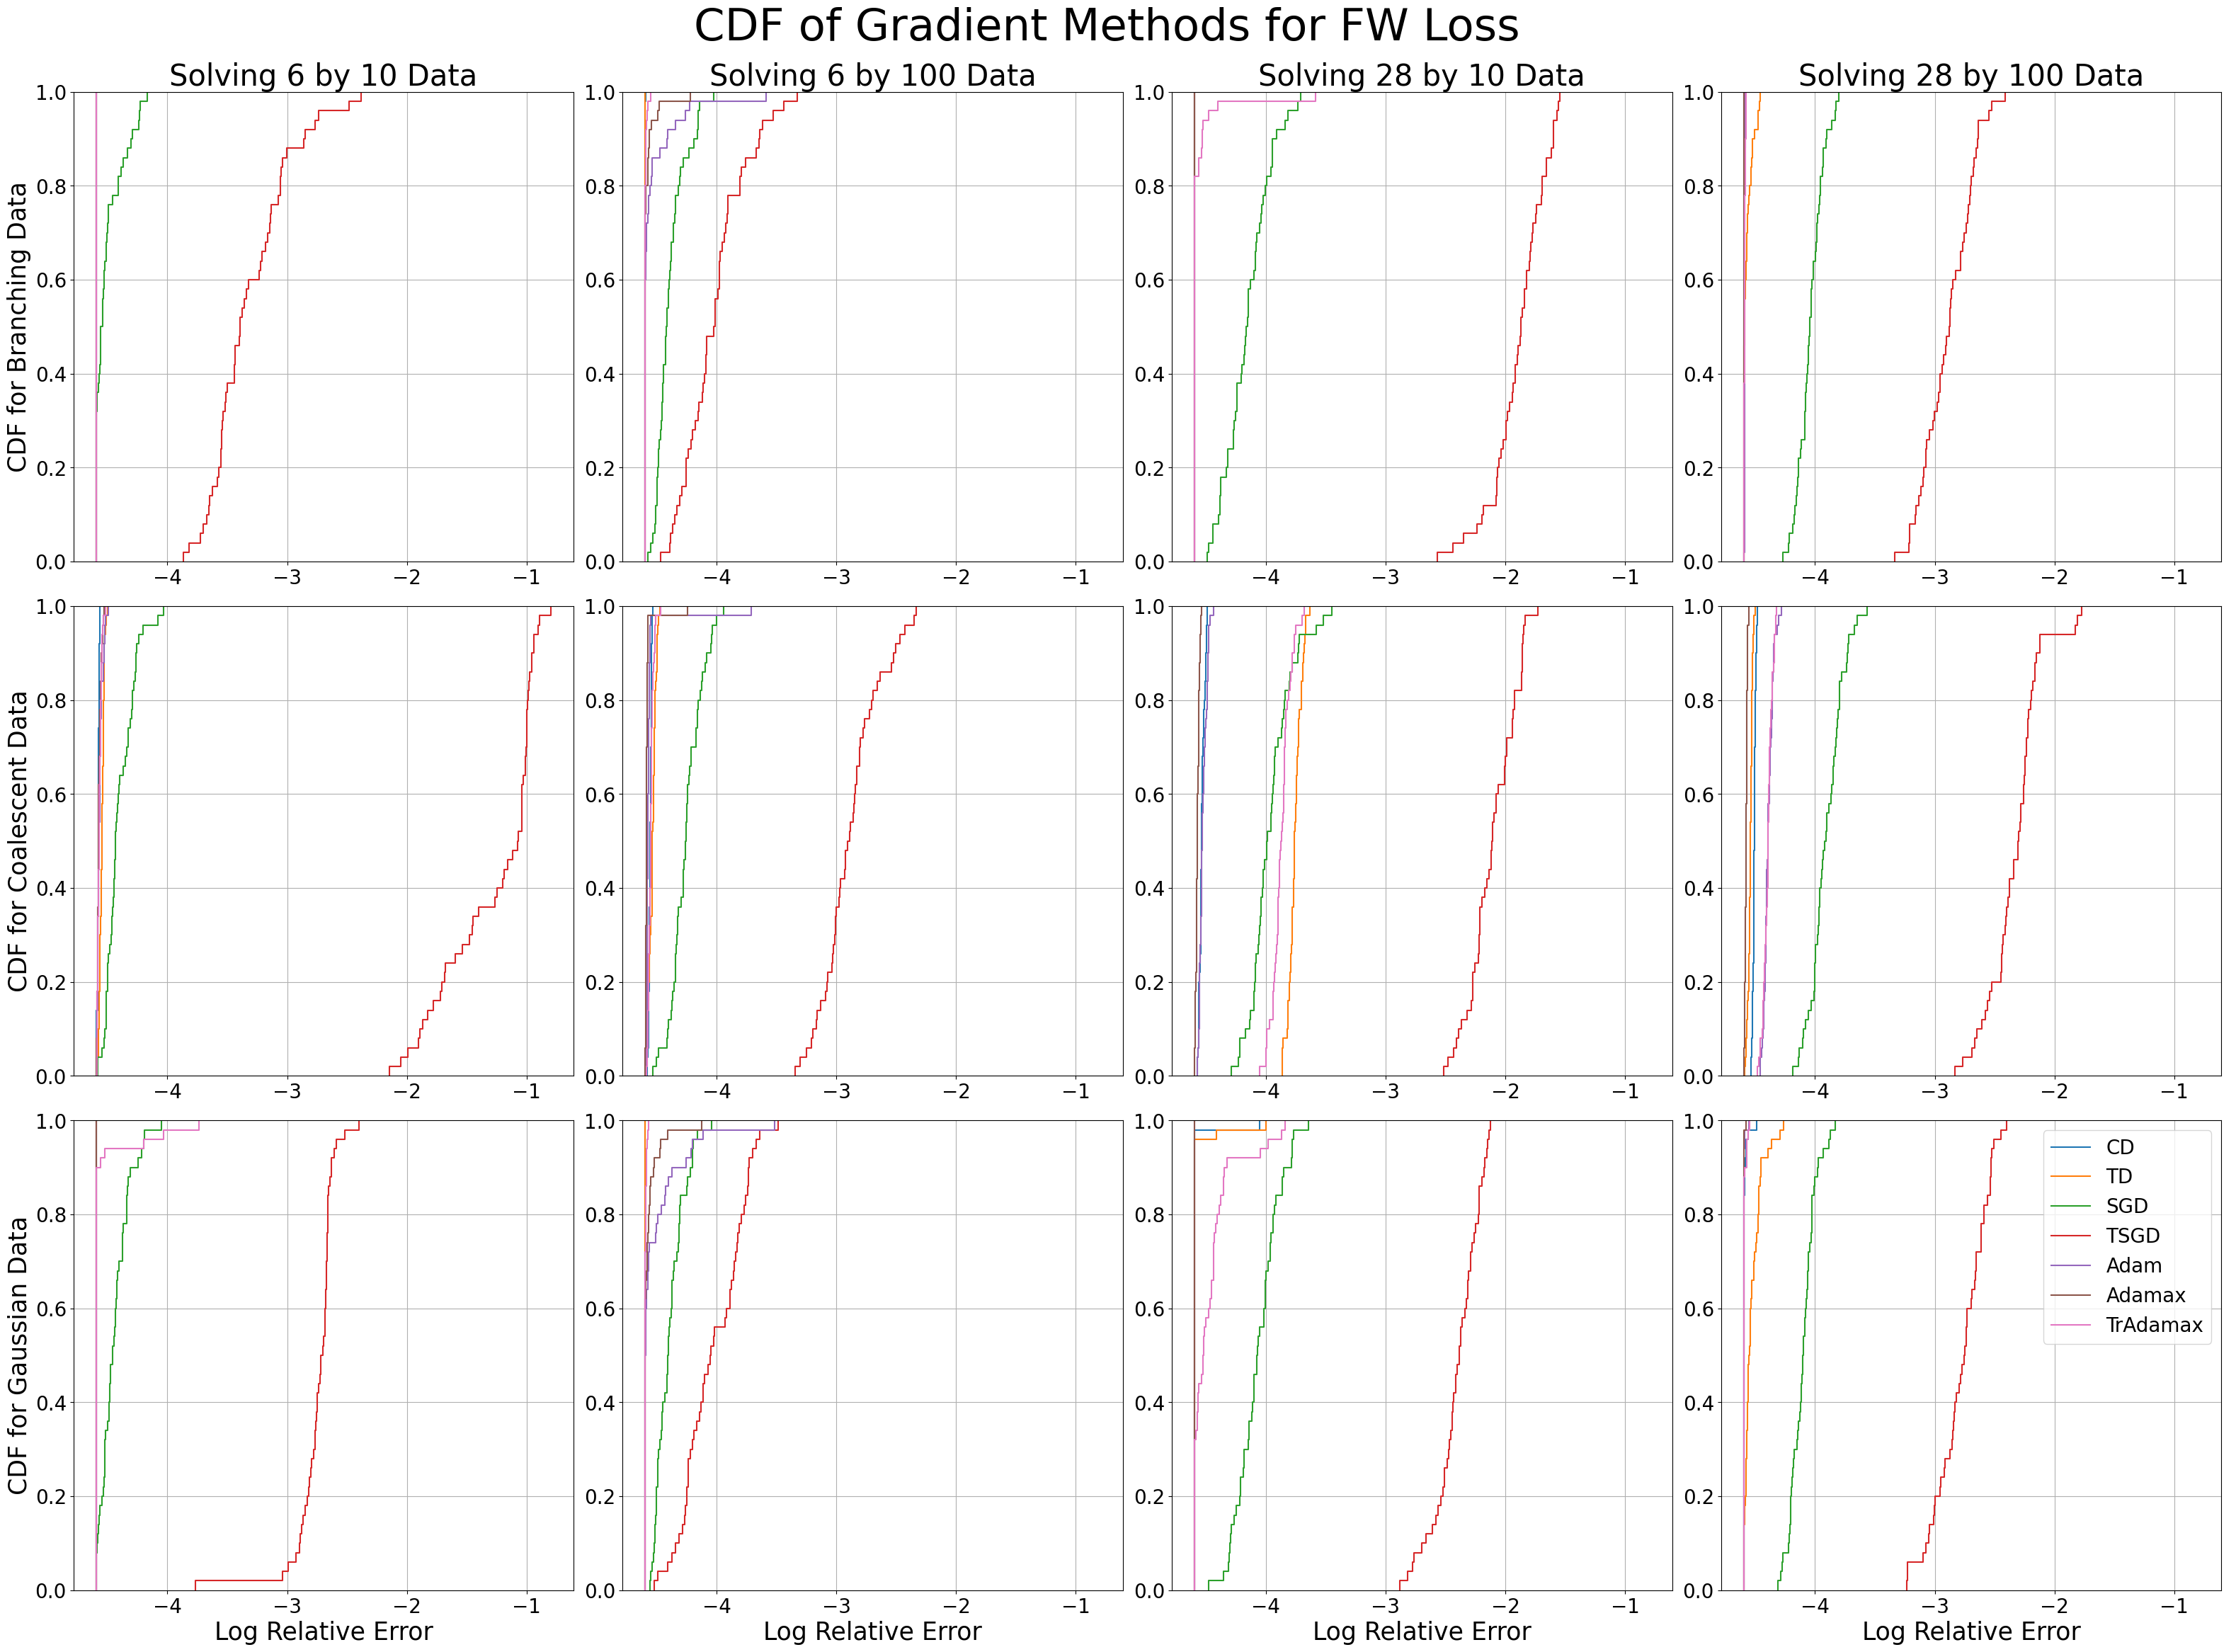

In [9]:
Stats_Prob = "FW"
FW_mean_std_DF, FW_solution_DF, FW_log_error_DF = experiment_analysis(FW_DF)
CDF(FW_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
FW_mean_log_error_DF = latex_table(FW_log_error_DF)

# Frechet Means

In [10]:
FM_DF = pd.read_pickle("DataFrames/FM_DF.pkl")

In [11]:
Stats_Prob = "FM"
FM_mean_std_DF, FM_solution_DF, FM_log_error_DF = experiment_analysis(FM_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -4.59 & -4.54 & -3.98 & -2.99 & -4.58 & -4.59 & -4.53 \\
6$times$10 Coalescent Data & -4.58 & -4.47 & -4.07 & -1.82 & -4.57 & -4.58 & -4.45 \\
6$times$10 Gaussian Data & -4.59 & -4.33 & -4.09 & -2.63 & -4.58 & -4.59 & -4.35 \\
6$times$100 Branching Data & -4.59 & -4.59 & -4.35 & -4.03 & -4.59 & -4.58 & -4.59 \\
6$times$100 Coalescent Data & -4.57 & -4.56 & -4.36 & -3.29 & -4.55 & -4.56 & -4.57 \\
6$times$100 Gaussian Data & -4.59 & -4.60 & -4.39 & -4.12 & -4.59 & -4.58 & -4.59 \\
28$times$10 Branching Data & -4.58 & -3.73 & -3.78 & -1.98 & -4.55 & -4.58 & -3.83 \\
28$times$10 Coalescent Data & -4.56 & -3.67 & -3.98 & -2.46 & -4.53 & -4.57 & -3.70 \\
28$times$10 Gaussian Data & -4.55 & -4.07 & -3.91 & -2.41 & -4.55 & -4.57 & -4.04 \\
28$times$100 Branching Data & -4.59 & -4.58 & -4.03 & -2.98 & -4.58 & -4.59 & -4.57 \\
28$time

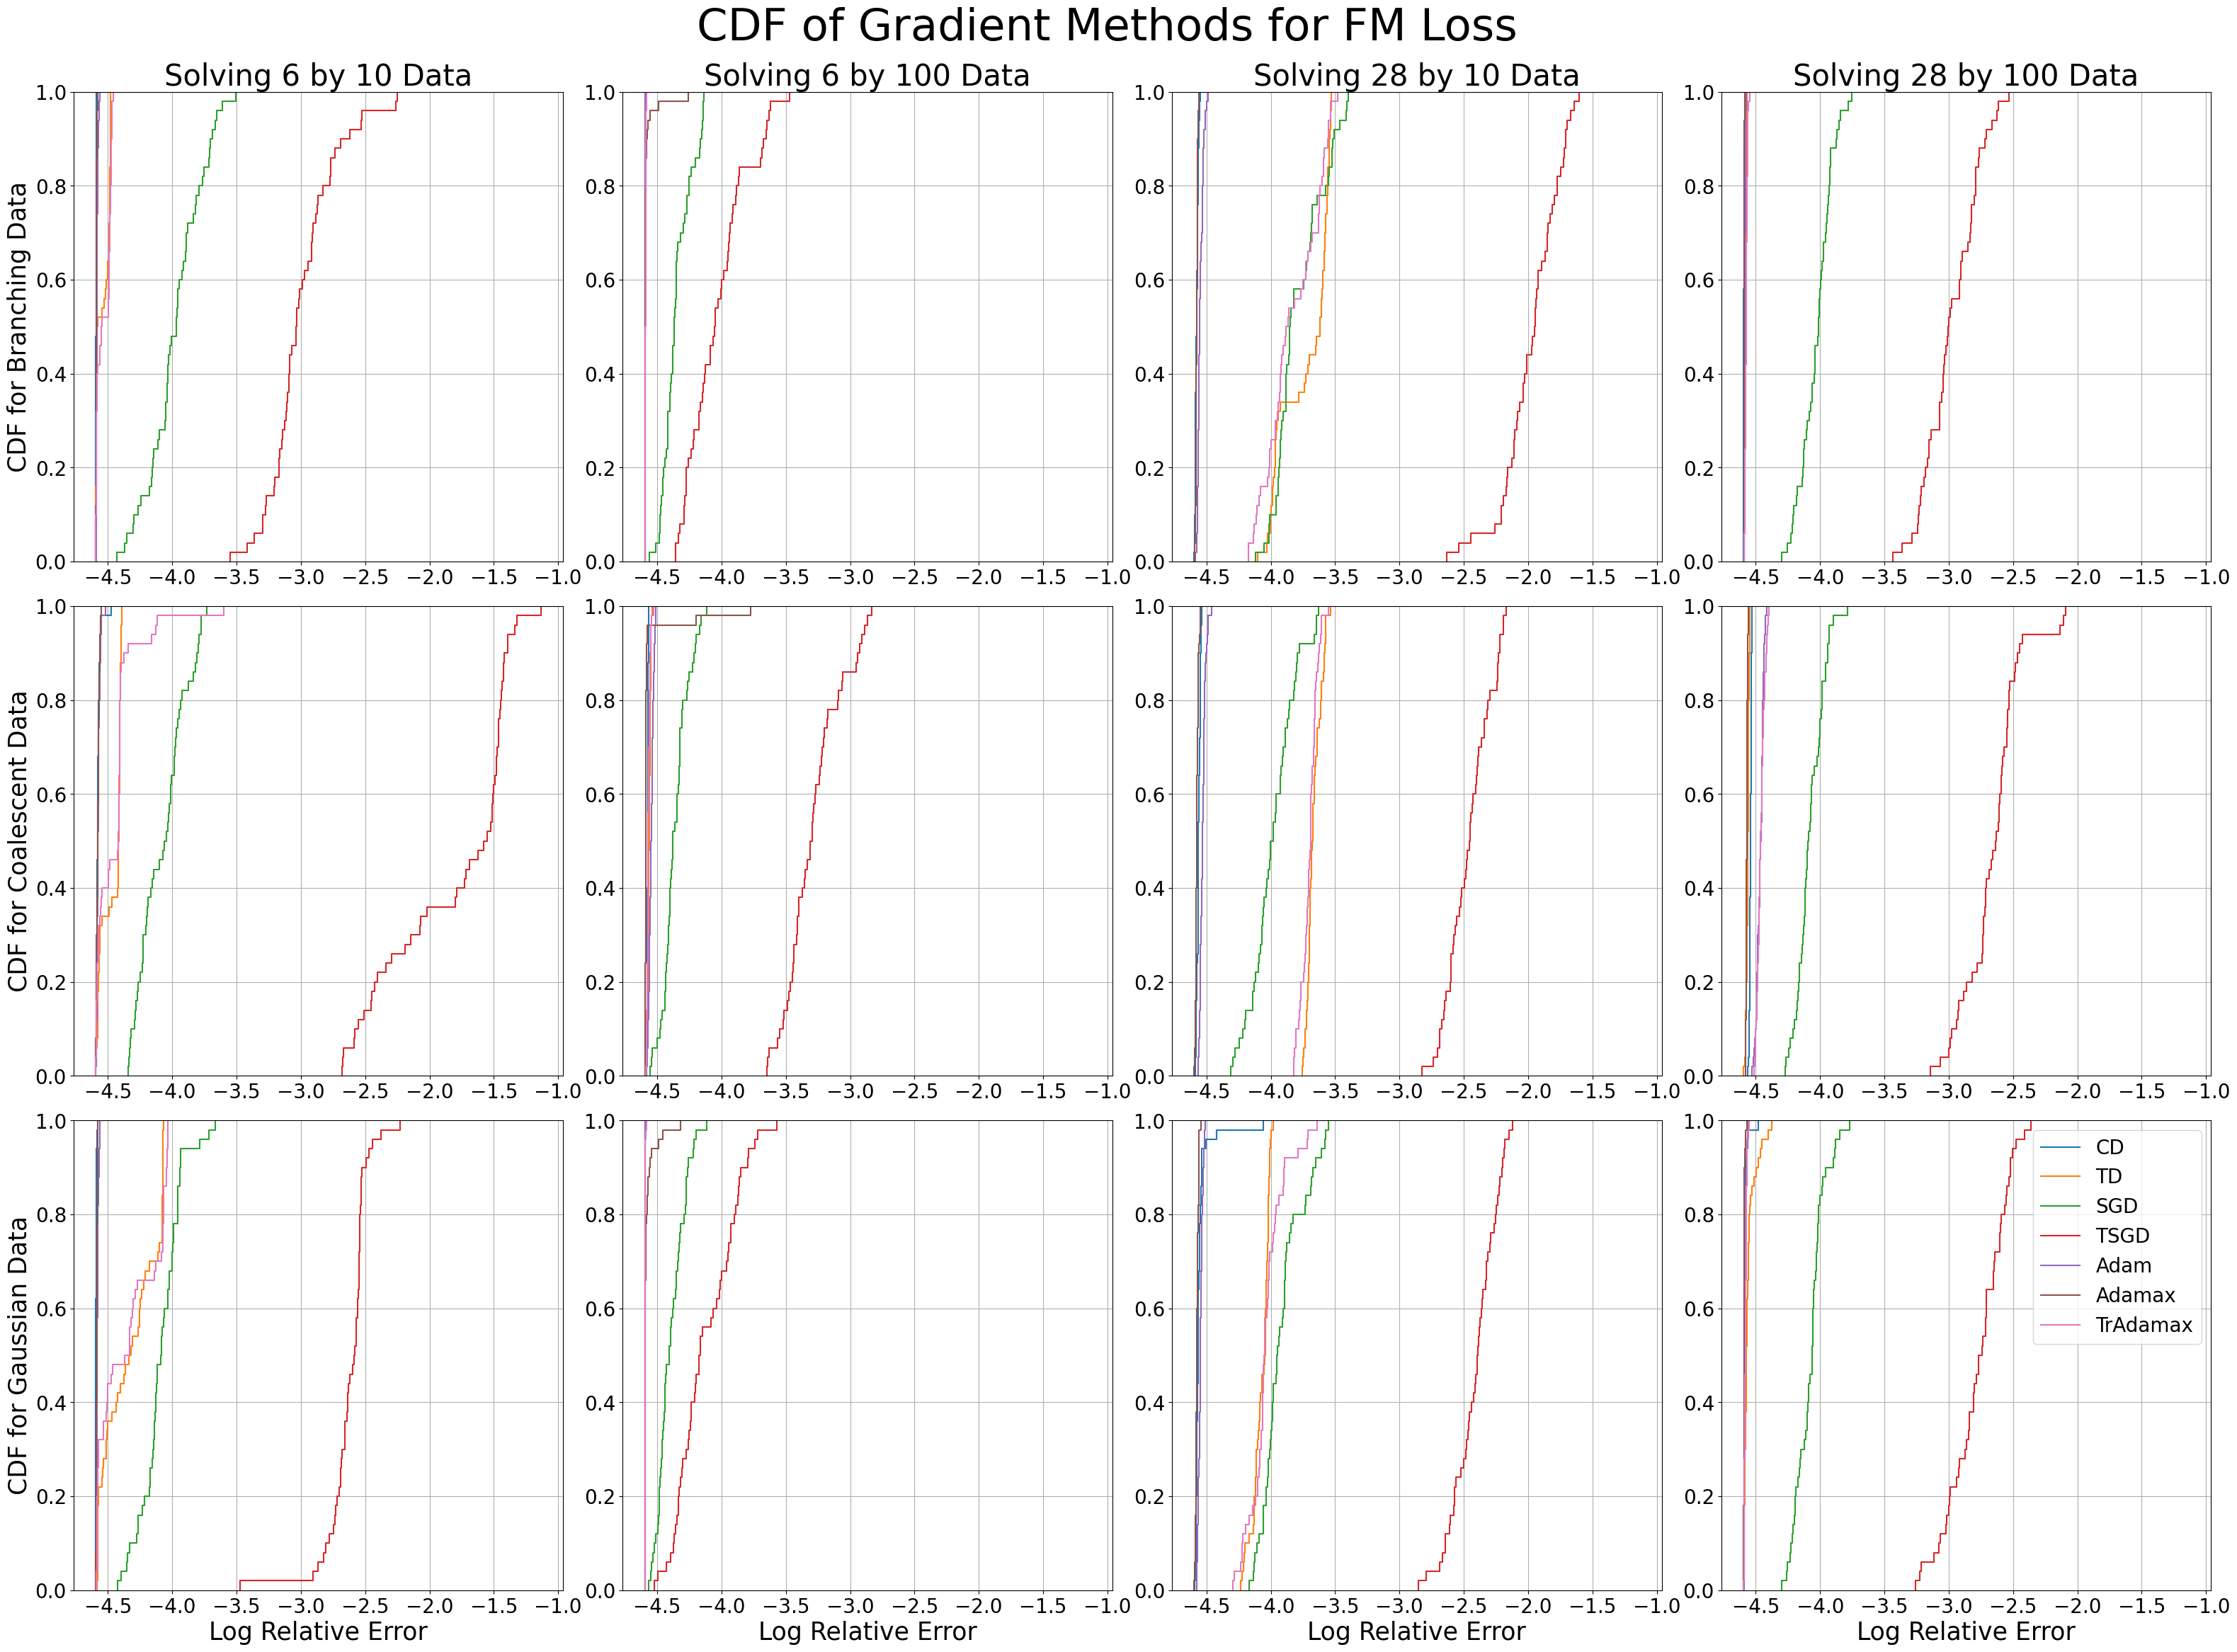

In [12]:
Stats_Prob = "FM"
FM_mean_std_DF, FM_solution_DF, FM_log_error_DF = experiment_analysis(FM_DF)
CDF(FM_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
FM_mean_log_error_DF = latex_table(FM_log_error_DF)

# 2-Wasserstein Projections

In [13]:
WD2_DF = pd.read_pickle("DataFrames/WD2_DF.pkl")

In [14]:
Stats_Prob = "WD2"
WD2_mean_std_DF, WD2_solution_DF, WD2_log_error_DF = experiment_analysis(WD2_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -3.02 & -4.09 & -2.16 & -2.11 & -2.95 & -3.00 & -3.89 \\
6$times$10 Coalescent Data & -3.71 & -3.92 & -2.44 & -3.13 & -3.78 & -3.68 & -4.12 \\
6$times$10 Gaussian Data & -3.59 & -3.83 & -2.87 & -2.75 & -3.61 & -3.57 & -3.89 \\
6$times$100 Branching Data & -3.44 & -4.24 & -2.91 & -1.60 & -3.79 & -3.79 & -4.02 \\
6$times$100 Coalescent Data & -4.26 & -4.55 & -3.27 & -2.58 & -4.39 & -4.45 & -4.50 \\
6$times$100 Gaussian Data & -3.69 & -4.17 & -3.33 & -2.73 & -3.78 & -3.78 & -4.18 \\
28$times$10 Branching Data & -3.39 & -4.31 & -3.16 & -2.03 & -3.53 & -3.55 & -4.32 \\
28$times$10 Coalescent Data & -4.11 & -3.79 & -3.39 & -2.42 & -4.17 & -4.12 & -3.80 \\
28$times$10 Gaussian Data & -3.43 & -3.91 & -3.21 & -2.15 & -3.50 & -3.44 & -3.83 \\
28$times$100 Branching Data & -3.61 & -4.55 & -3.37 & -2.65 & -3.85 & -3.85 & -4.51 \\
28$time

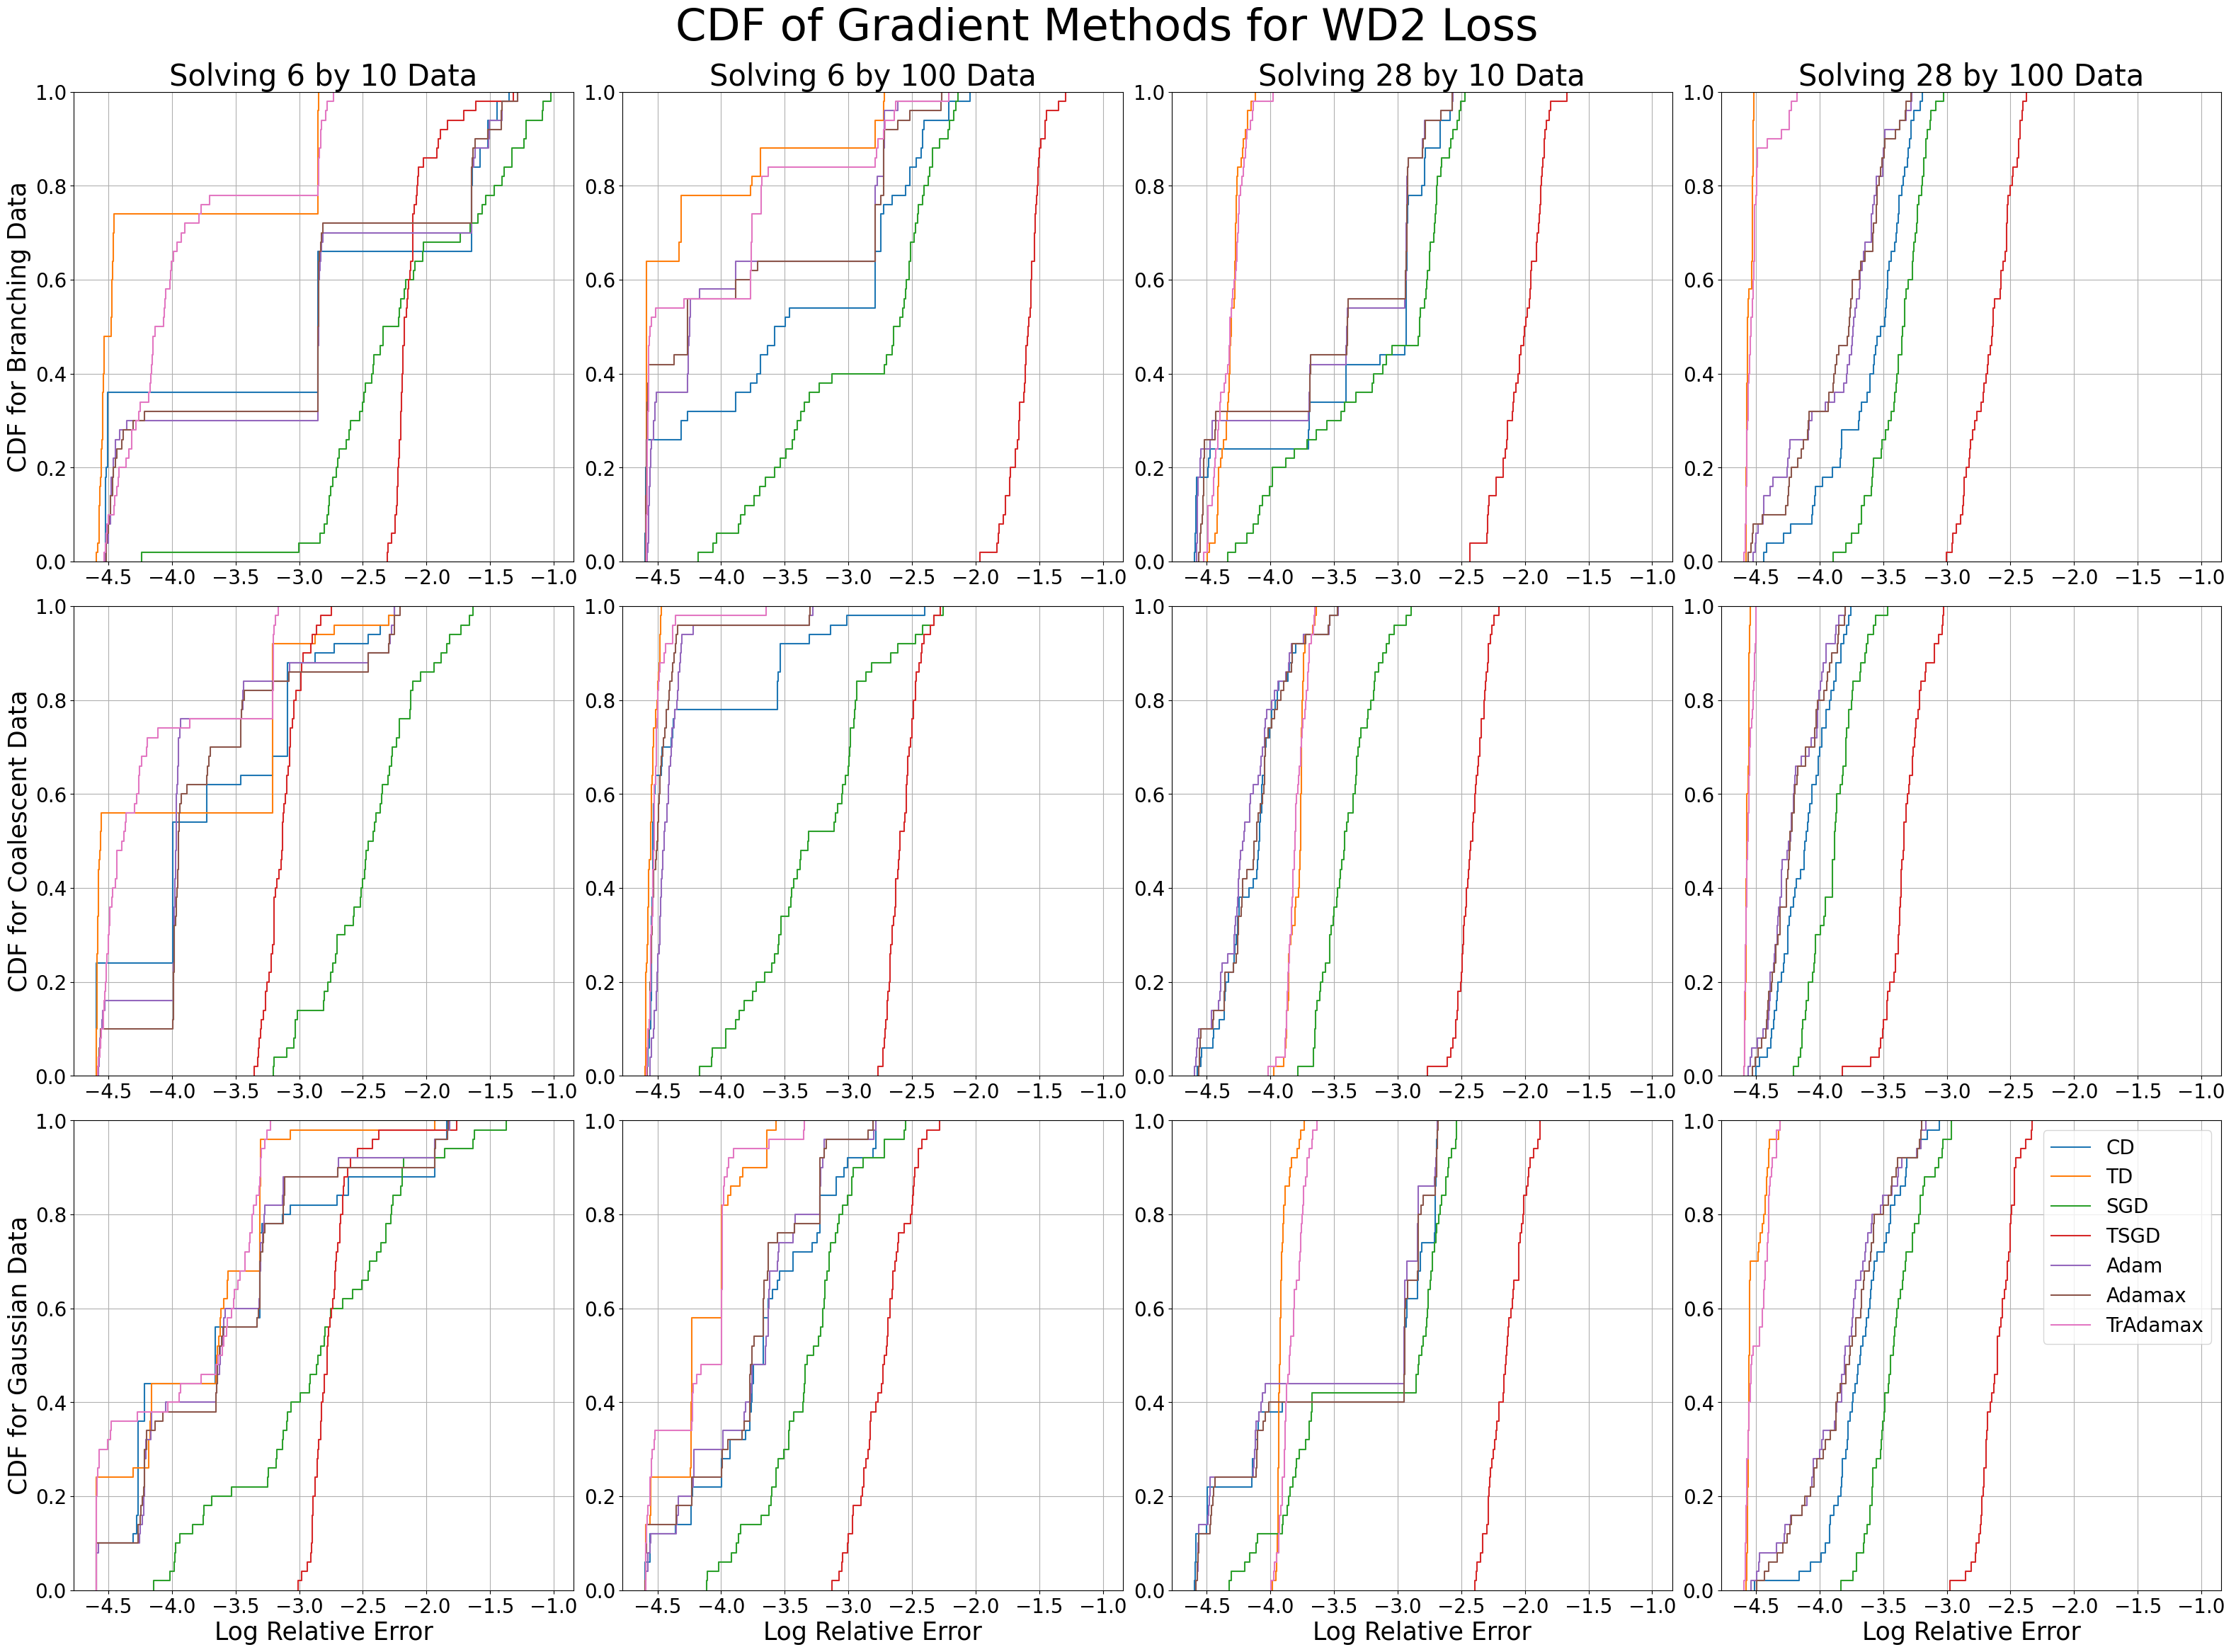

In [15]:
Stats_Prob = "WD2"
WD2_mean_std_DF, WD2_solution_DF, WD2_log_error_DF = experiment_analysis(WD2_DF)
CDF(WD2_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
WD2_mean_log_error_DF = latex_table(WD2_log_error_DF)

# inf-Wasserstein Projections

In [16]:
WDinf_DF = pd.read_pickle("DataFrames/WDinf_DF.pkl")

In [17]:
Stats_Prob = "WDinf"
WDinf_mean_std_DF, WDinf_solution_DF, WDinf_log_error_DF = experiment_analysis(WDinf_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -1.63 & -4.32 & -0.57 & -0.91 & -1.68 & -1.69 & -4.32 \\
6$times$10 Coalescent Data & -4.00 & -4.47 & -0.99 & -1.43 & -4.03 & -4.04 & -4.46 \\
6$times$10 Gaussian Data & -3.77 & -4.42 & -1.76 & -3.33 & -3.76 & -3.75 & -4.40 \\
6$times$100 Branching Data & -3.35 & -4.48 & -1.94 & -0.95 & -3.34 & -3.36 & -4.47 \\
6$times$100 Coalescent Data & -3.85 & -4.51 & -2.06 & -2.21 & -3.84 & -3.85 & -4.51 \\
6$times$100 Gaussian Data & -3.63 & -4.40 & -1.61 & -1.22 & -3.70 & -3.63 & -4.36 \\
28$times$10 Branching Data & -3.68 & -3.53 & -2.22 & -1.17 & -4.11 & -3.93 & -3.17 \\
28$times$10 Coalescent Data & -4.22 & -3.95 & -2.76 & -1.92 & -4.42 & -4.36 & -3.94 \\
28$times$10 Gaussian Data & -4.02 & -3.14 & -2.13 & -0.95 & -4.43 & -4.30 & -2.85 \\
28$times$100 Branching Data & -3.46 & -3.58 & -1.37 & -1.19 & -3.68 & -3.59 & -3.39 \\
28$time

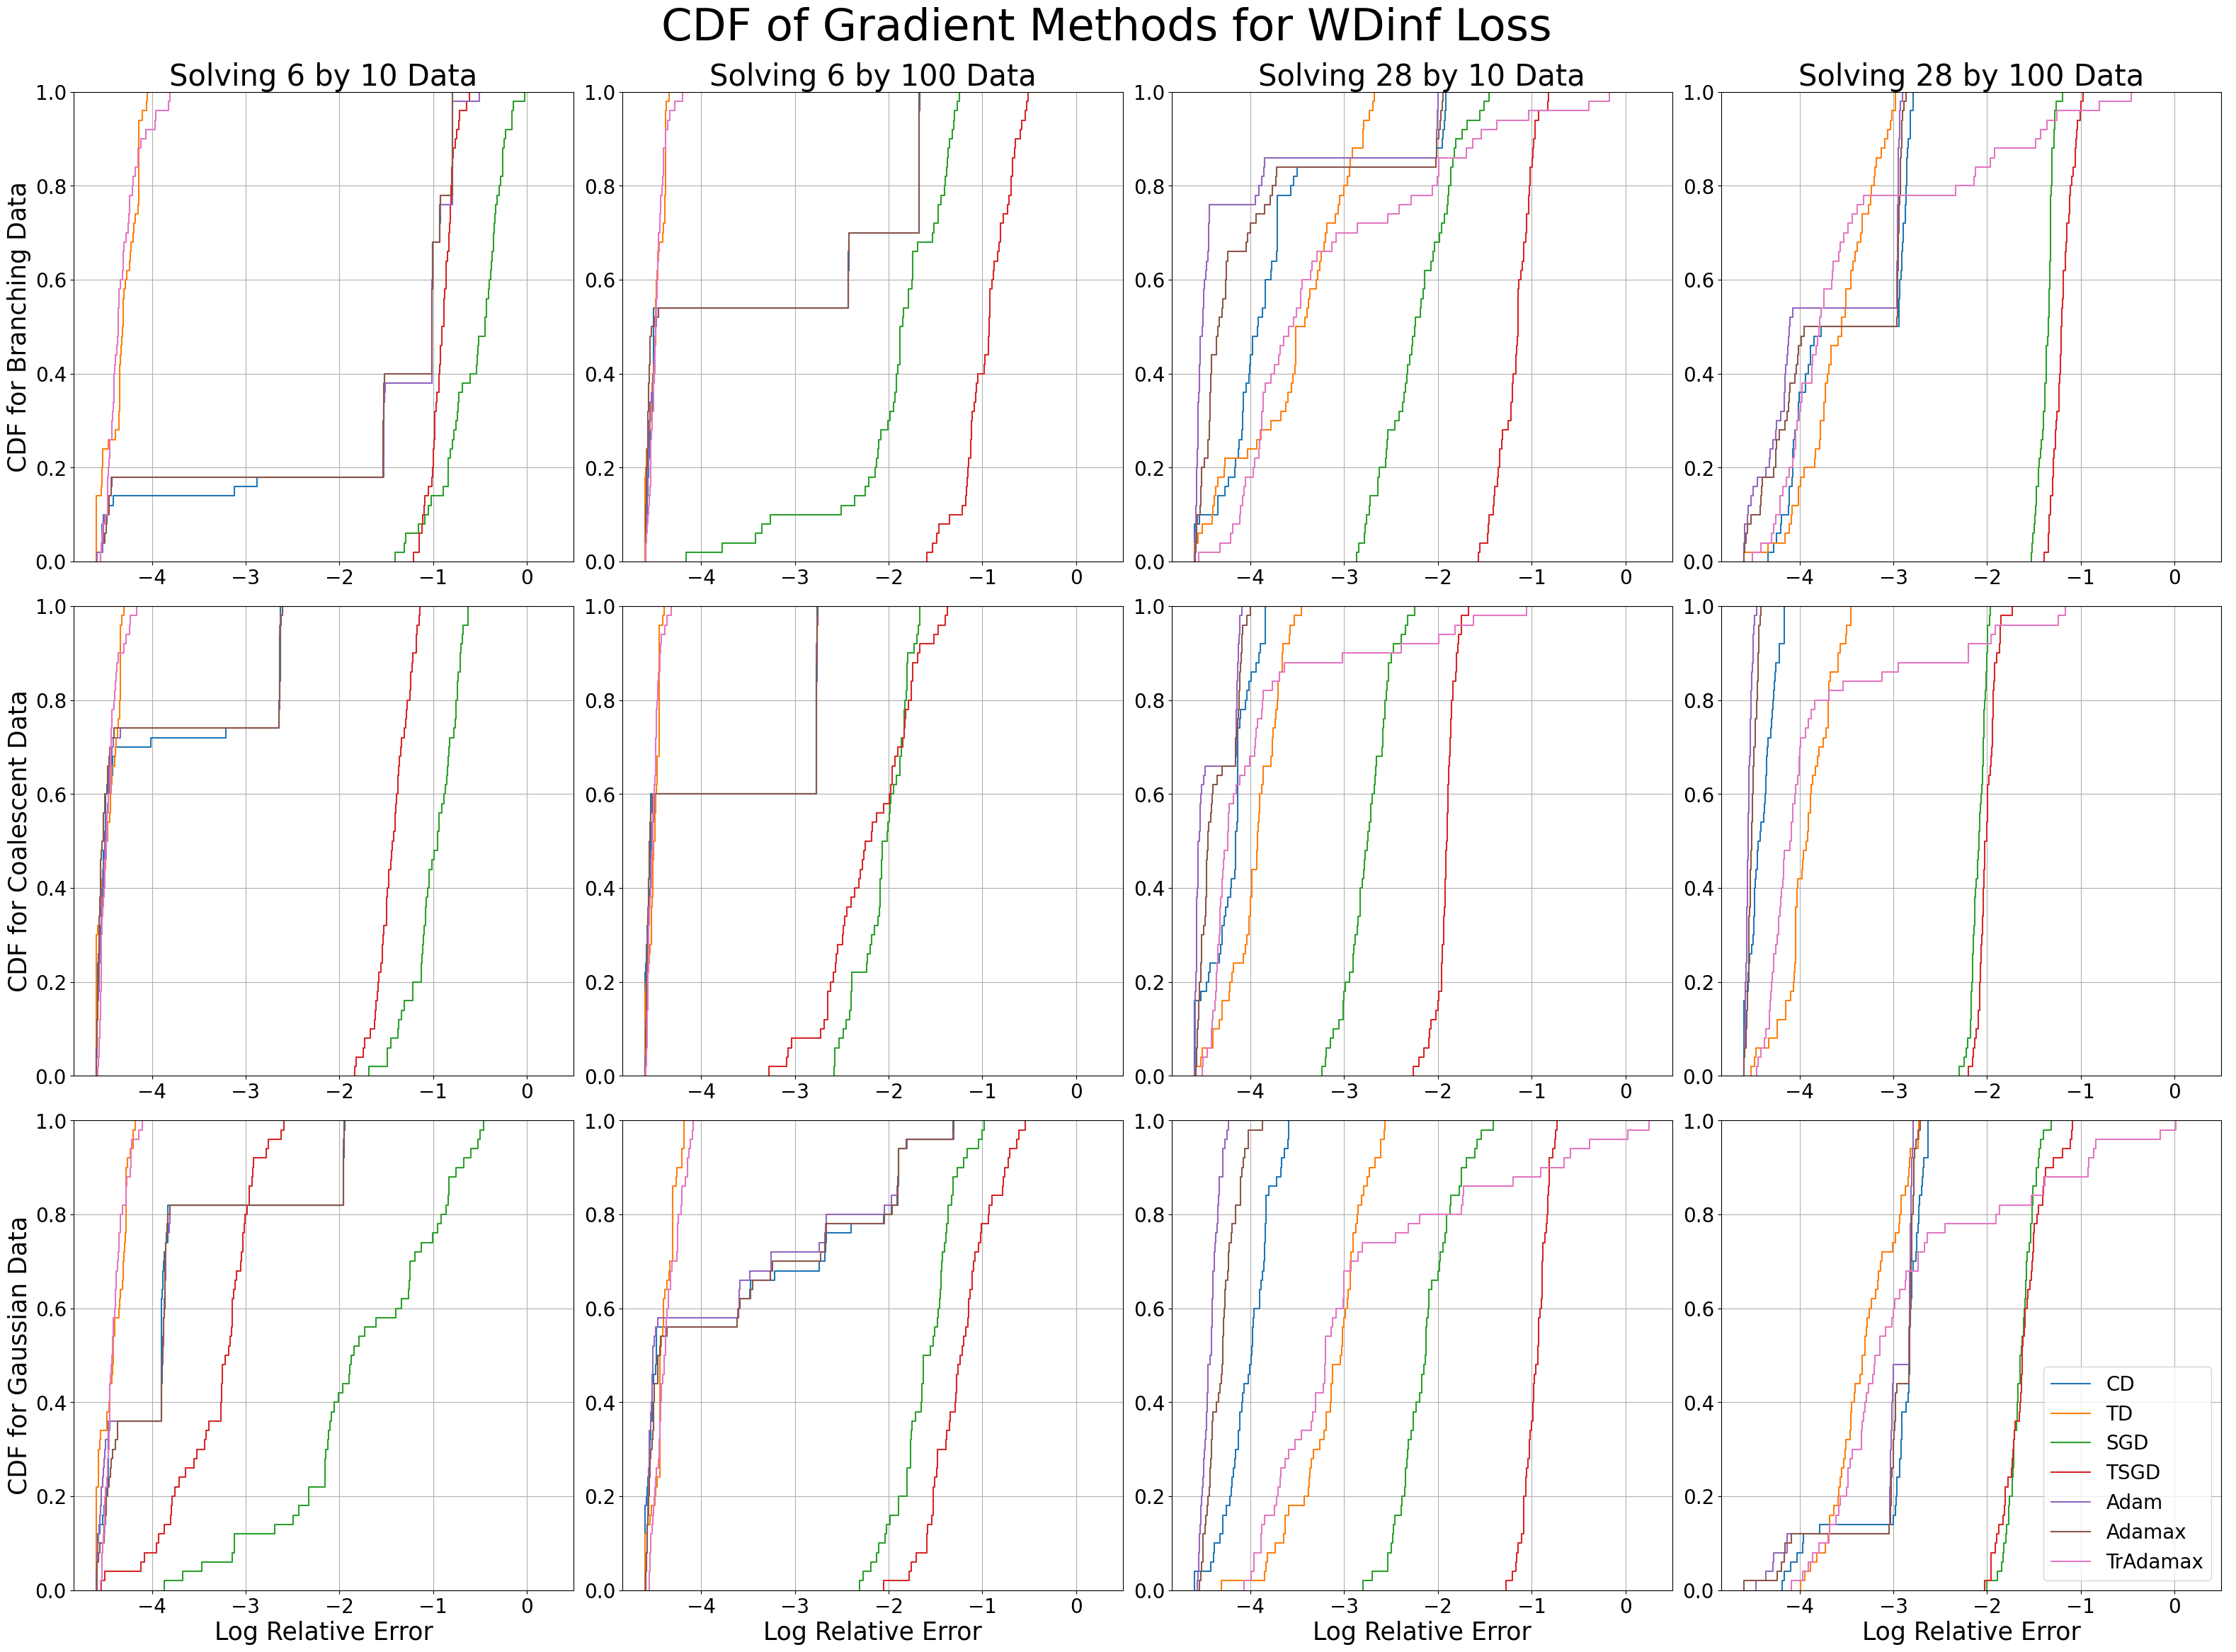

In [18]:
Stats_Prob = "WDinf"
WDinf_mean_std_DF, WDinf_solution_DF, WDinf_log_error_DF = experiment_analysis(WDinf_DF)
CDF(WDinf_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
WDinf_mean_log_error_DF = latex_table(WDinf_log_error_DF)

# Tropical Polytope PCA

In [19]:
PCA_DF = pd.read_pickle("DataFrames/PCA_DF.pkl")

In [20]:
Stats_Prob = "PCA"
PCA_mean_std_DF, PCA_solution_DF, PCA_log_error_DF = experiment_analysis(PCA_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -1.06 & -2.09 & -0.78 & -0.90 & -0.78 & -0.71 & -1.61 \\
6$times$10 Coalescent Data & 0.75 & -0.93 & 0.85 & 0.75 & 0.87 & 0.89 & 0.20 \\
6$times$10 Gaussian Data & -1.33 & -2.28 & -1.11 & -1.20 & -1.12 & -1.16 & -2.13 \\
6$times$100 Branching Data & -1.81 & -2.57 & -1.59 & -1.06 & -2.02 & -2.02 & -2.50 \\
6$times$100 Coalescent Data & -0.67 & -1.26 & -0.40 & 0.09 & -0.84 & -0.83 & -0.78 \\
6$times$100 Gaussian Data & -2.03 & -3.07 & -1.90 & -1.24 & -2.11 & -2.15 & -3.01 \\
28$times$10 Branching Data & -0.95 & -2.15 & -0.81 & -0.71 & -0.87 & -0.85 & -1.43 \\
28$times$10 Coalescent Data & -0.22 & -0.56 & -0.18 & -0.11 & -0.20 & -0.20 & -0.37 \\
28$times$10 Gaussian Data & -1.39 & -2.85 & -1.30 & -1.31 & -1.39 & -1.37 & -2.24 \\
28$times$100 Branching Data & -2.25 & -4.00 & -2.15 & -1.96 & -2.41 & -2.36 & -3.06 \\
28$times$100 C

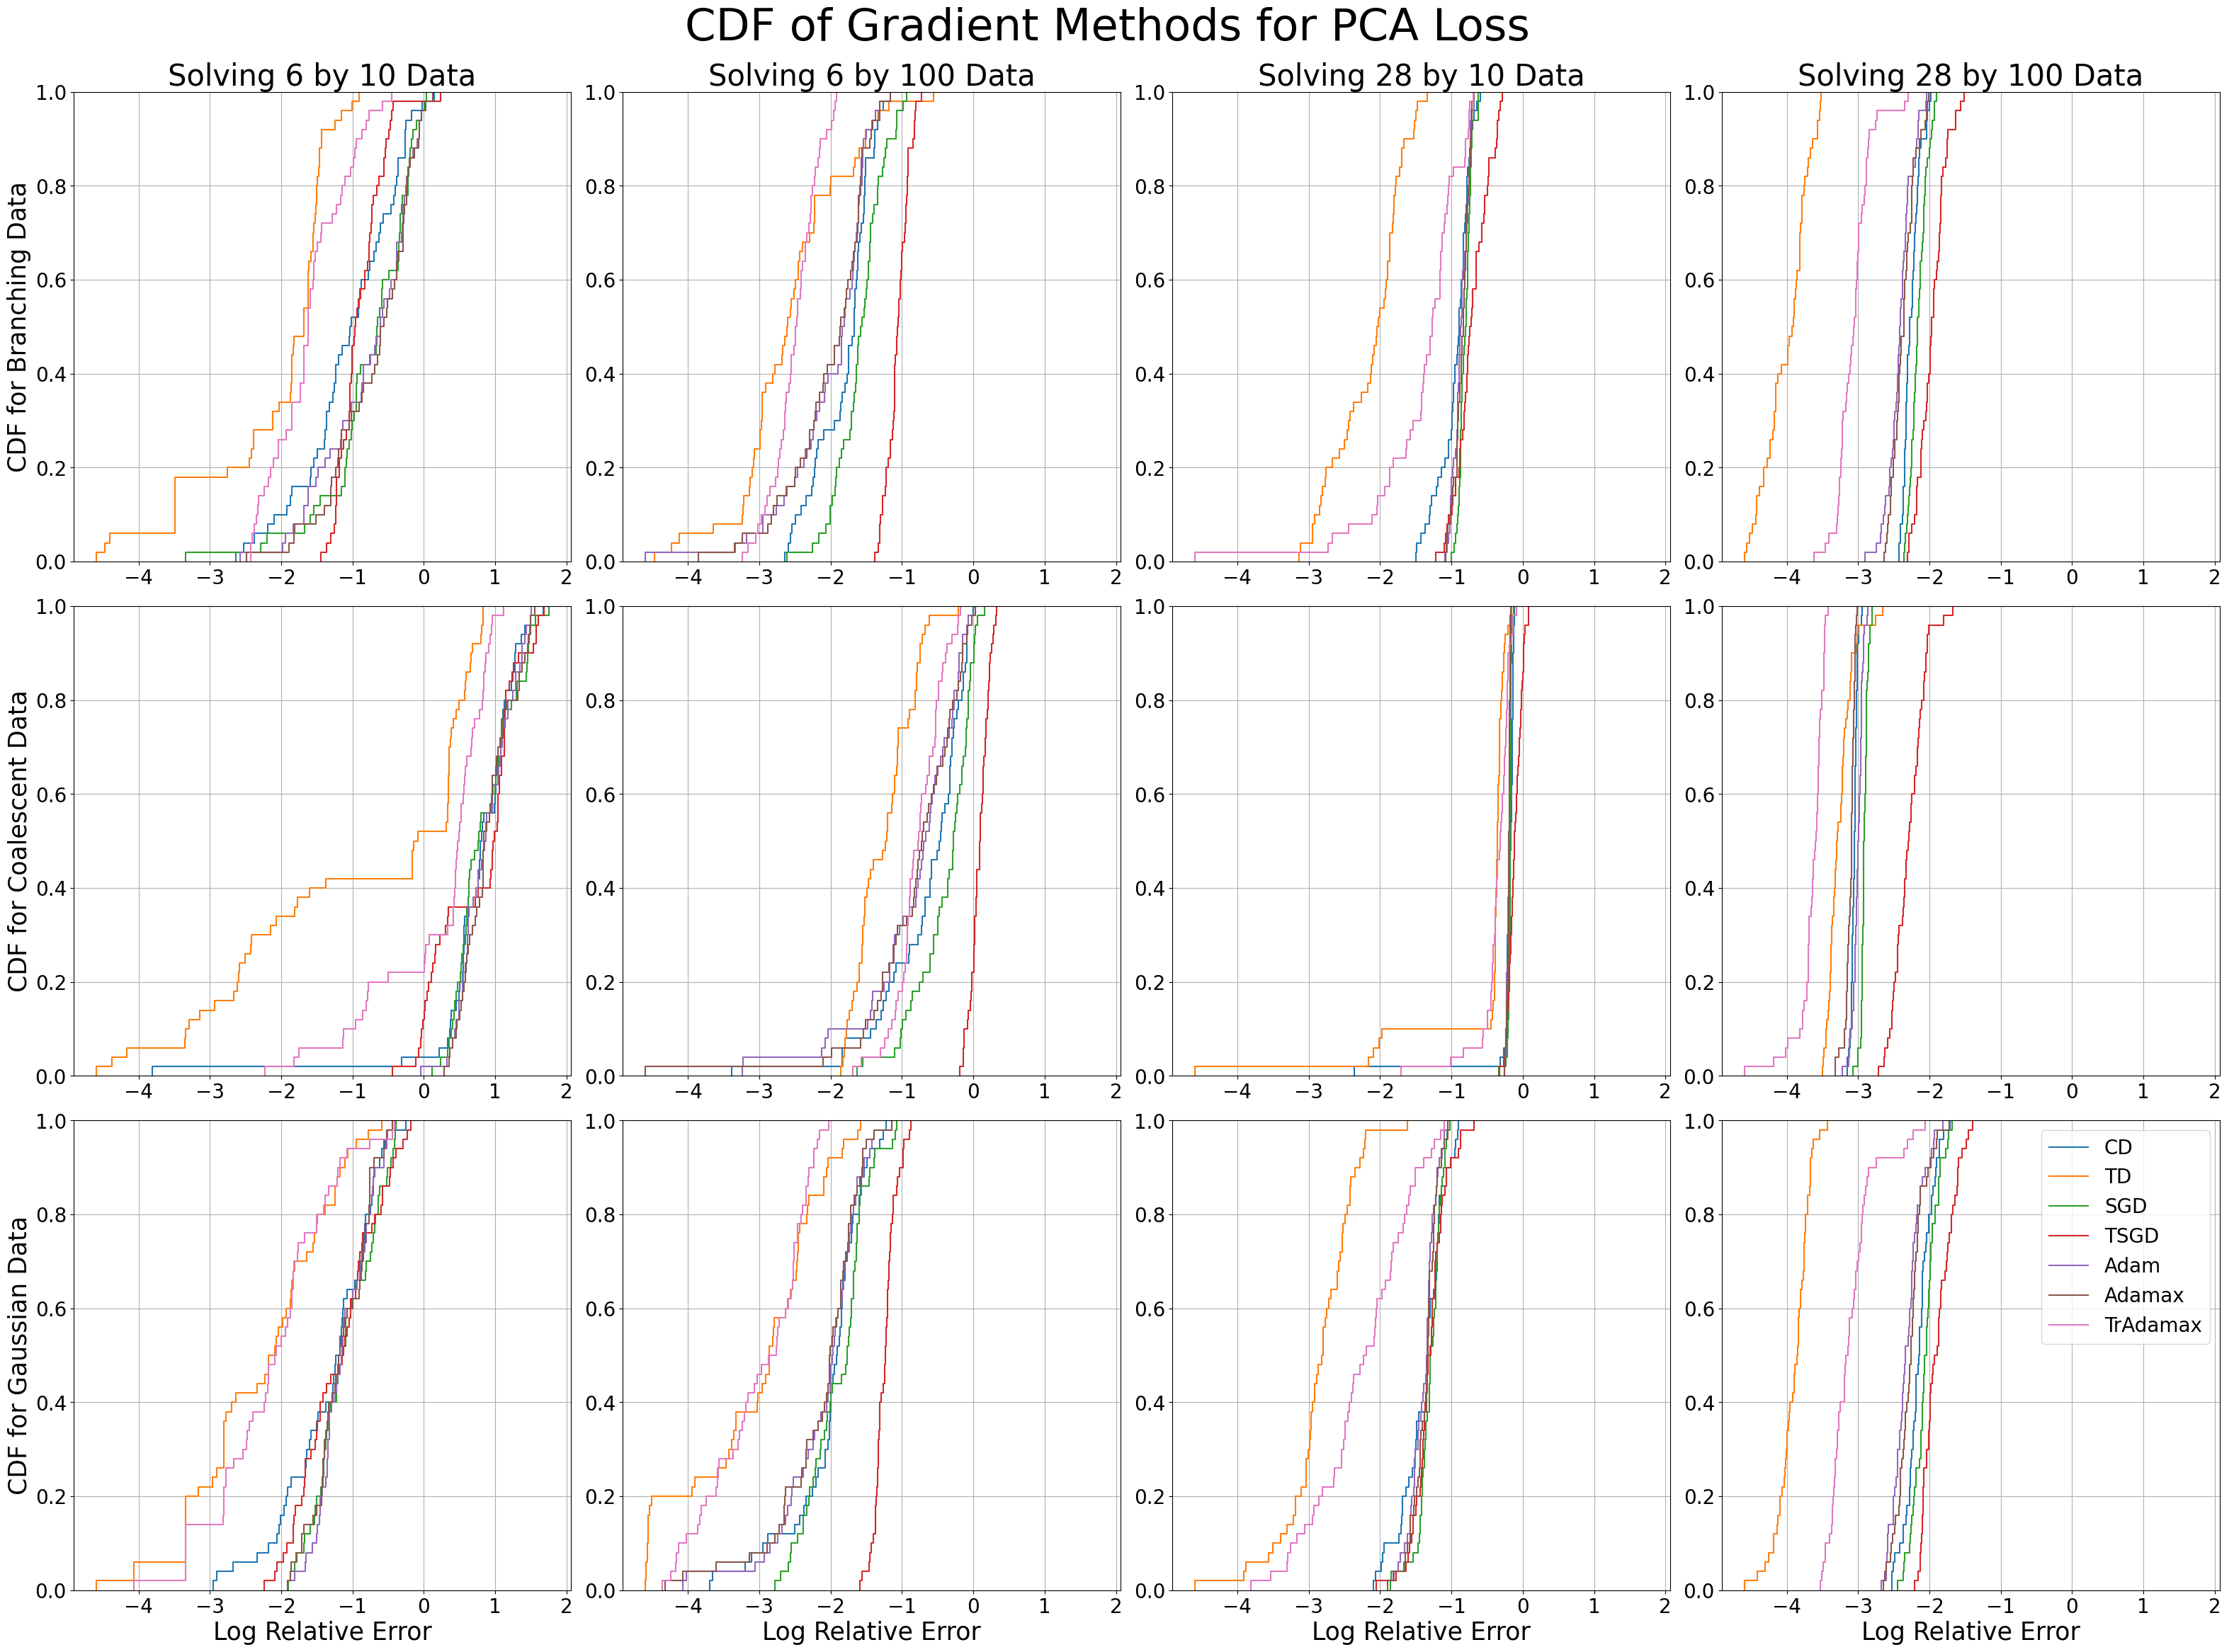

In [21]:
Stats_Prob = "PCA"
PCA_mean_std_DF, PCA_solution_DF, PCA_log_error_DF = experiment_analysis(PCA_DF)
CDF(PCA_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
PCA_mean_log_error_DF = latex_table(PCA_log_error_DF)

# Logistic Regression

In [22]:
LogR_DF = pd.read_pickle("DataFrames/LogR_DF.pkl")

In [23]:
Stats_Prob = "LogR"
LogR_mean_std_DF, LogR_solution_DF, LogR_log_error_DF = experiment_analysis(LogR_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -1.48 & -1.77 & -0.97 & -0.98 & -1.36 & -1.31 & -1.50 \\
6$times$10 Coalescent Data & -1.41 & -1.32 & -0.88 & -0.40 & -1.18 & -1.14 & -1.21 \\
6$times$10 Gaussian Data & -0.81 & -0.73 & -0.33 & -0.27 & -0.64 & -0.73 & -0.70 \\
6$times$100 Branching Data & -1.93 & -2.08 & -1.95 & -0.85 & -2.39 & -2.18 & -1.42 \\
6$times$100 Coalescent Data & -2.10 & -2.10 & -2.12 & -0.80 & -2.45 & -2.21 & -1.58 \\
6$times$100 Gaussian Data & -2.24 & -2.44 & -2.21 & -0.92 & -2.73 & -2.56 & -1.67 \\
28$times$10 Branching Data & 0.99 & 1.47 & 0.99 & 0.84 & 1.30 & 1.58 & 1.38 \\
28$times$10 Coalescent Data & 0.73 & 1.20 & 0.65 & 0.47 & 0.91 & 1.19 & 1.00 \\
28$times$10 Gaussian Data & 0.54 & 0.97 & 0.58 & 0.28 & 0.83 & 1.12 & 0.81 \\
28$times$100 Branching Data & 0.99 & 1.11 & 0.99 & 0.24 & 0.85 & 1.10 & 1.06 \\
28$times$100 Coalescent Data & 1.20

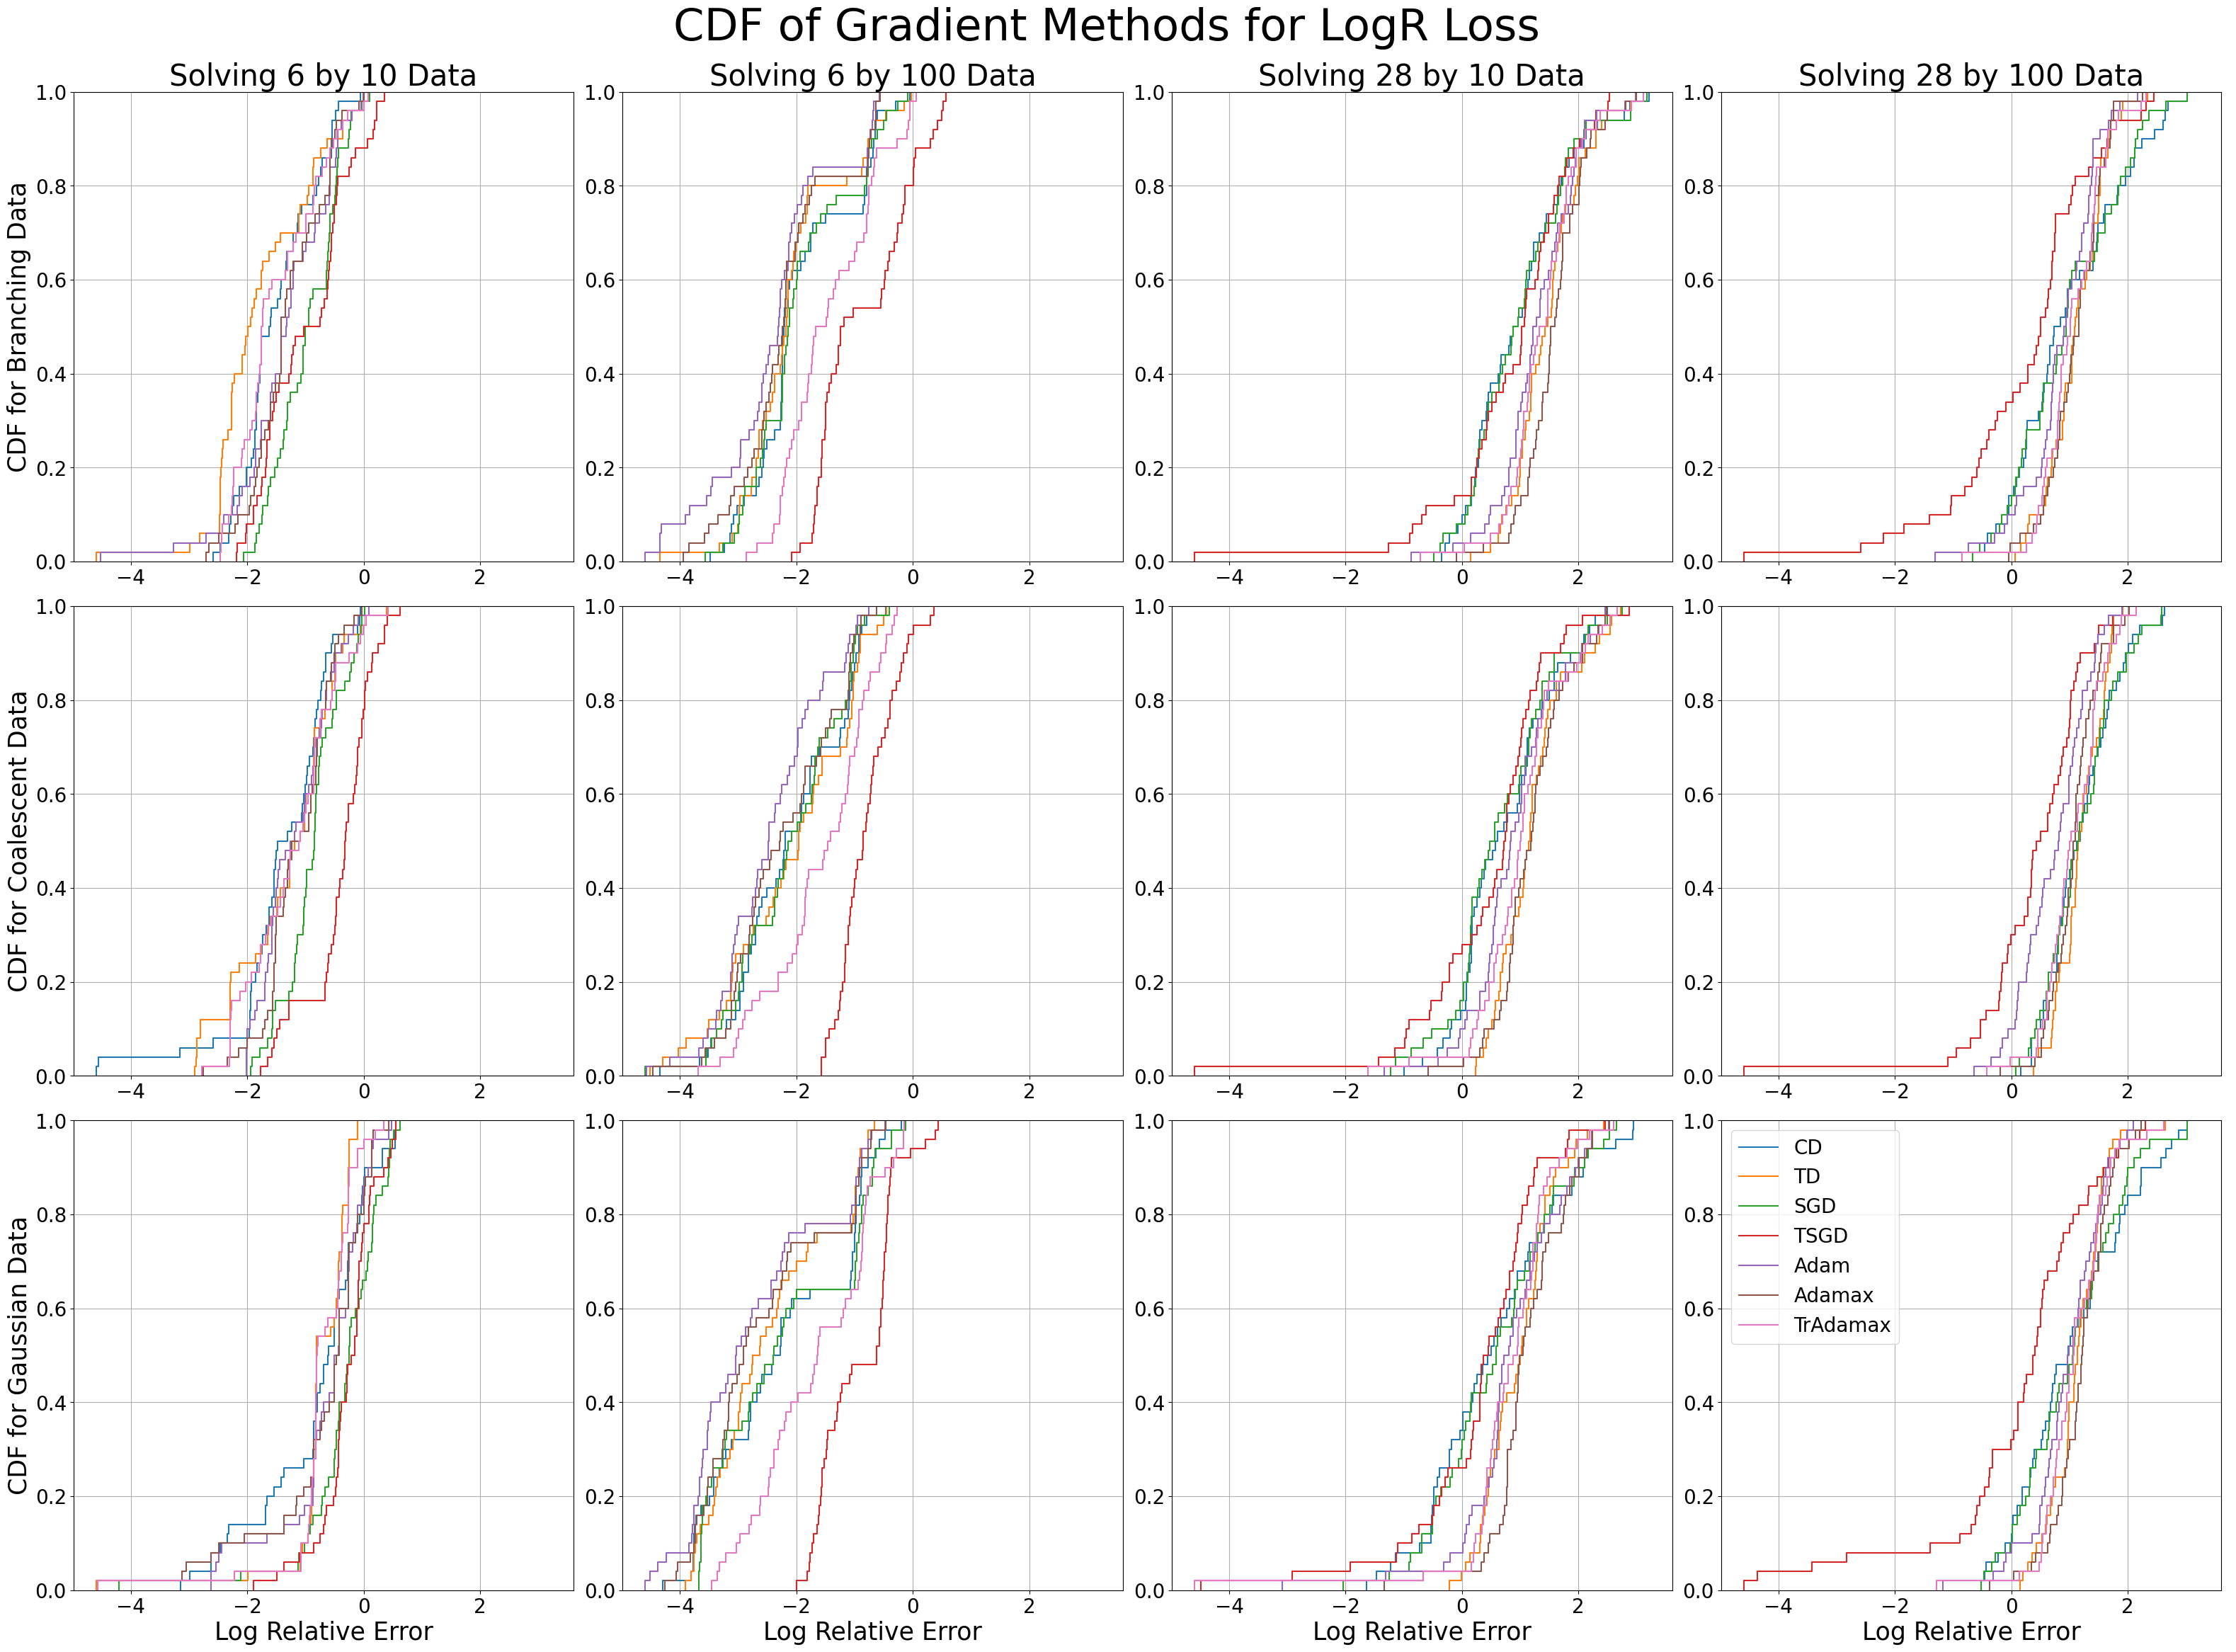

In [24]:
Stats_Prob = "LogR"
LogR_mean_std_DF, LogR_solution_DF, LogR_log_error_DF = experiment_analysis(LogR_DF)
CDF(LogR_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
LogR_mean_log_error_DF = latex_table(LogR_log_error_DF)

# Linear Regression

In [25]:
LR_DF = pd.read_pickle("DataFrames/LR_DF.pkl")

In [26]:
Stats_Prob = "LR"
LR_mean_std_DF, LR_solution_DF, LR_log_error_DF = experiment_analysis(LR_DF, Stats_Prob = Stats_Prob)

\begin{tabular}{llllllll}
\toprule
dataset & CD & TD & SGD & TropSGD & Adam & Adamax & TropAdamax \\
 &  &  &  &  &  &  &  \\
\midrule
6$times$10 Branching Data & -0.97 & -5.79 & -0.56 & -2.16 & -0.80 & -0.84 & -4.39 \\
6$times$10 Coalescent Data & -2.70 & -5.87 & -2.11 & -5.47 & -2.97 & -2.66 & -6.58 \\
6$times$10 Gaussian Data & -1.19 & -5.48 & -0.80 & -1.35 & -1.05 & -1.10 & -4.10 \\
6$times$100 Branching Data & -0.79 & -5.49 & -0.71 & -1.43 & -0.72 & -0.72 & -3.53 \\
6$times$100 Coalescent Data & -5.54 & -5.76 & -3.11 & -5.57 & -6.90 & -7.01 & -6.52 \\
6$times$100 Gaussian Data & -1.04 & -5.50 & -0.88 & -1.70 & -1.02 & -1.02 & -3.81 \\
28$times$10 Branching Data & -1.49 & -5.51 & -0.93 & -4.49 & -1.14 & -1.14 & -5.57 \\
28$times$10 Coalescent Data & -2.43 & -6.63 & -1.77 & -5.55 & -2.16 & -2.29 & -6.18 \\
28$times$10 Gaussian Data & -1.26 & -5.16 & -0.79 & -4.29 & -1.08 & -1.08 & -5.72 \\
28$times$100 Branching Data & -0.90 & -4.37 & -0.61 & -1.42 & -0.85 & -0.77 & -3.32 \\
28$time

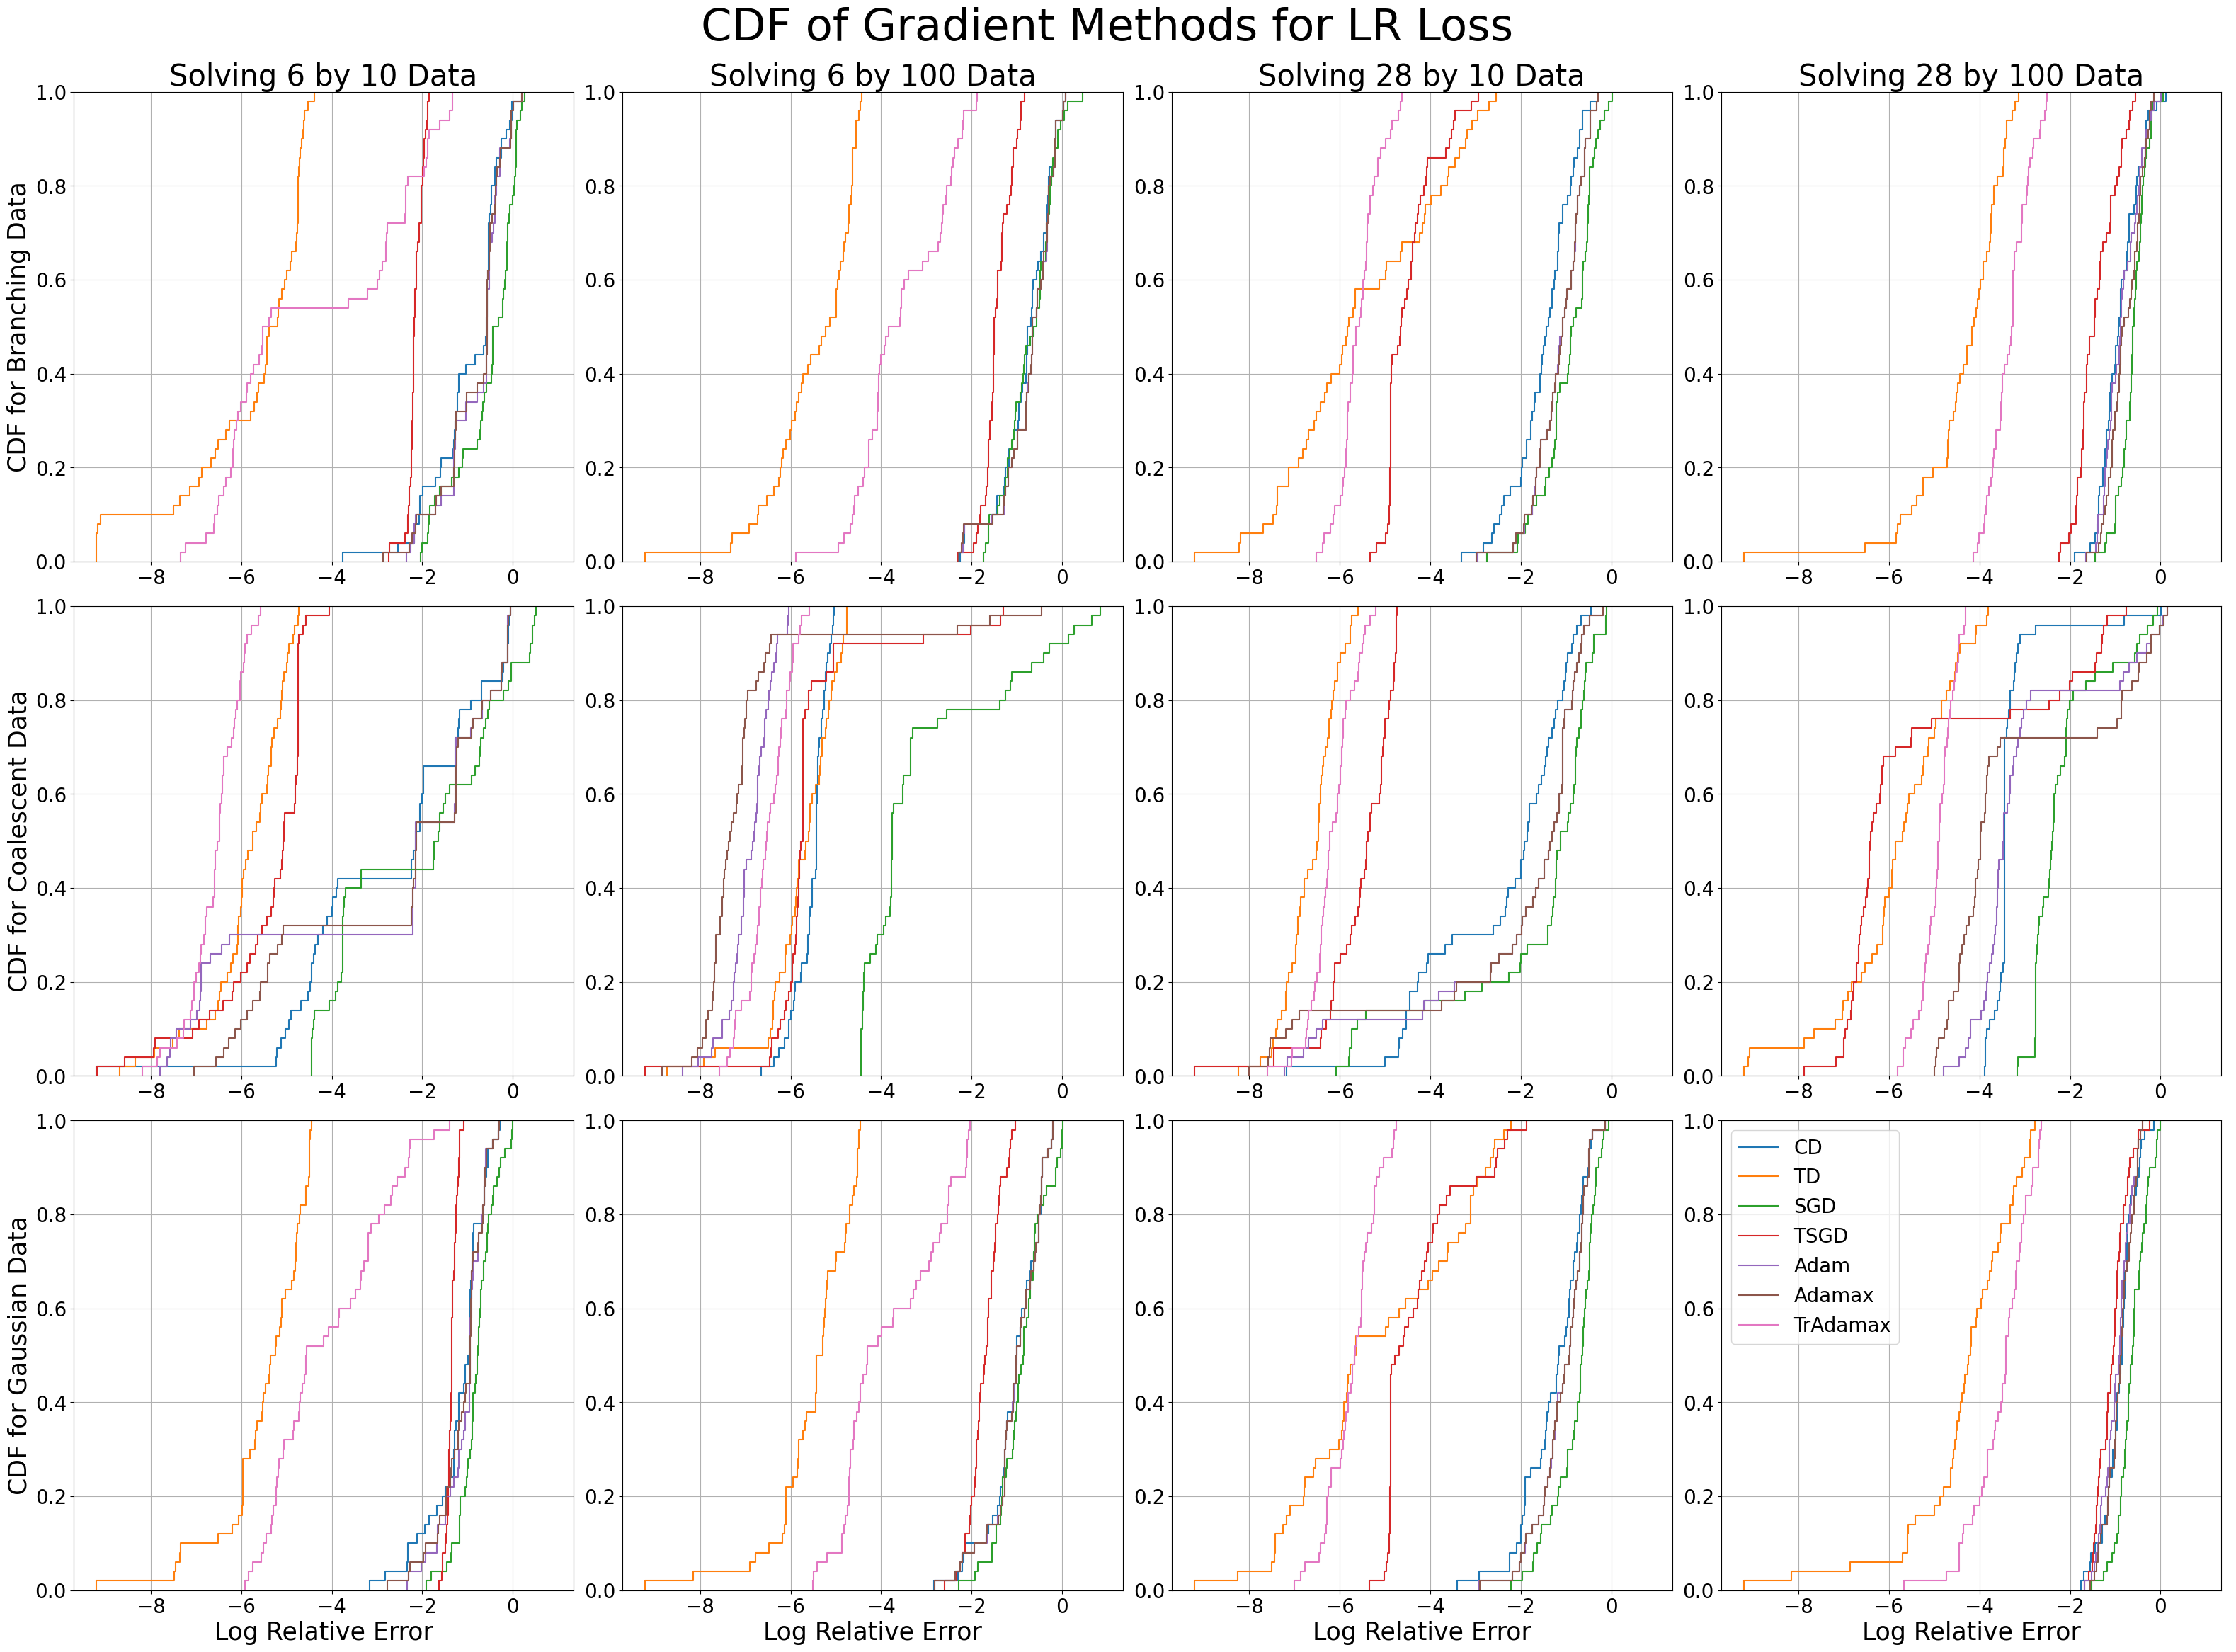

In [27]:
Stats_Prob = "LR"
LR_mean_std_DF, LR_solution_DF, LR_log_error_DF = experiment_analysis(LR_DF, Stats_Prob = Stats_Prob)
CDF(LR_log_error_DF, save_plot = True, Stats_Prob = Stats_Prob)
LR_mean_log_error_DF = latex_table(LR_log_error_DF)

# Runtimes

In [28]:
lr_DF_dict = {
    "FW" : FW_DF,
    "FM" : FM_DF,
    "WD2" : WD2_DF,
    "WDinf" : WDinf_DF,
    "PCA" : PCA_DF,
    "LogR" : LogR_DF,
    "LR" : LR_DF
}

time_DF = pd.concat([FW_DF.merge(pd.DataFrame(["FW"], columns = ['Stats_Prob']), how = "cross"), 
          FM_DF.merge(pd.DataFrame(["FM"], columns = ['Stats_Prob']), how = "cross"),
          WD2_DF.merge(pd.DataFrame(["WD2"], columns = ['Stats_Prob']), how = "cross"),
          WDinf_DF.merge(pd.DataFrame(["WDinf"], columns = ['Stats_Prob']), how = "cross"),
          PCA_DF.merge(pd.DataFrame(["PCA"], columns = ['Stats_Prob']), how = "cross"),
          LogR_DF.merge(pd.DataFrame(["LogR"], columns = ['Stats_Prob']), how = "cross"),
          LR_DF.merge(pd.DataFrame(["LR"], columns = ['Stats_Prob']), how = "cross")]).groupby(['Stats_Prob', 'grad'])['time'].agg([('mean', 'mean'), ('std', 'std')]).reset_index()

print(time_DF.pivot(index = 'Stats_Prob', columns = 'grad', values = 'mean').to_latex(float_format="%.3f"))
# def time_taken(DF_dicts):
        
#    return DF_dict[Stat_Prob].groupby(['grad'])['time taken'].agg([('mean', 'mean'), ('std', 'std')]).reset_index()
        
#print(lr_DF.groupby(['grad'])['time taken'].agg([('mean', 'mean'), ('std', 'std')]).reset_index())

\begin{tabular}{lrrrrrrr}
\toprule
grad & Adam & Adamax & CD & SGD & TD & TropAdamax & TropSGD \\
Stats_Prob &  &  &  &  &  &  &  \\
\midrule
FM & 0.480 & 0.520 & 0.435 & 0.499 & 0.391 & 0.460 & 0.464 \\
FW & 0.347 & 0.363 & 0.301 & 0.342 & 0.294 & 0.422 & 0.370 \\
LR & 0.494 & 0.499 & 0.386 & 0.420 & 0.386 & 0.537 & 0.433 \\
LogR & 0.987 & 1.015 & 0.962 & 0.934 & 0.943 & 1.084 & 0.943 \\
PCA & 1.117 & 1.081 & 1.014 & 1.052 & 1.037 & 1.174 & 1.029 \\
WD2 & 2.739 & 2.134 & 2.392 & 2.209 & 2.341 & 2.246 & 2.272 \\
WDinf & 2.947 & 3.049 & 2.772 & 2.565 & 2.501 & 3.162 & 2.807 \\
\bottomrule
\end{tabular}

